In [1]:
import pandas as pd
import numpy as np
import matplotlib.style
import matplotlib.pyplot as plt
import yfinance as yf
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")
from itertools import product

In [2]:
symbol = "EURUSD=X"
start = "2023-01-01"
end = "2024-01-01"

In [4]:
df = yf.download(symbol, start, end, interval='1h').Close.to_frame()
df.rename(columns={"Close": "price"}, inplace=True)
df

[*********************100%%**********************]  1 of 1 completed


,price
Datetime,
2023-01-02 00:00:00+00:00,1.0709
2023-01-02 01:00:00+00:00,1.0707
2023-01-02 02:00:00+00:00,1.0704
2023-01-02 03:00:00+00:00,1.0709
2023-01-02 04:00:00+00:00,1.0701
...,...
2023-12-29 18:00:00+00:00,1.1055
2023-12-29 19:00:00+00:00,1.1044
2023-12-29 20:00:00+00:00,1.1044


In [5]:
df['returns'] = np.log(df['price'].div(df['price'].shift(1)))

In [12]:
resultsDf = pd.DataFrame(columns=['window', 'type', 'result'])

for window in range(1,100):
    df['position_momentum'] = - np.sign(df['returns'].rolling(window=window).mean())
    df['position_contrarian'] = - df['position_momentum']
    df['strategy_momentum'] = df.position_momentum.shift(1) * df.returns
    df['strategy_contrarian'] = df.position_contrarian.shift(1) * df.returns
    result_momentum = df['strategy_momentum'].sum()
    result_contrarian = df['strategy_contrarian'].sum()

    resultDictMomentum = {'window': window, 'type': 'momentum', 'result': result_momentum}
    resultDictContrarian = {'window': window, 'type': 'contrarian', 'result': result_contrarian}
    resultsDf.loc[len(resultsDf)] = resultDictMomentum
    resultsDf.loc[len(resultsDf)] = resultDictContrarian
    print('Window {} | Momentum: {} | Contrarian {}'.format(window, result_momentum, result_contrarian))

resultsDf

Window 1 | Momentum: 0.12895291867592265 | Contrarian -0.12895291867592265
Window 2 | Momentum: 0.05338660886525929 | Contrarian -0.05338660886525929
Window 3 | Momentum: -0.009854476557520413 | Contrarian 0.009854476557520413
Window 4 | Momentum: 0.008961243308215874 | Contrarian -0.008961243308215874
Window 5 | Momentum: -0.06783196077356612 | Contrarian 0.06783196077356612
Window 6 | Momentum: 0.014351460117207684 | Contrarian -0.014351460117207684
Window 7 | Momentum: 0.0007526190204333863 | Contrarian -0.0007526190204333863
Window 8 | Momentum: -0.02964532923530636 | Contrarian 0.02964532923530636
Window 9 | Momentum: -0.03579433971680785 | Contrarian 0.03579433971680785
Window 10 | Momentum: -0.03733459590978715 | Contrarian 0.03733459590978715
Window 11 | Momentum: -0.04279459182335539 | Contrarian 0.04279459182335539
Window 12 | Momentum: 0.018514941534839957 | Contrarian -0.018514941534839957
Window 13 | Momentum: 0.08400050010361185 | Contrarian -0.08400050010361185
Window 14

,window,type,result
0,1,momentum,0.1290
1,1,contrarian,-0.1290
2,2,momentum,0.0534
3,2,contrarian,-0.0534
4,3,momentum,-0.0099
...,...,...,...
193,97,contrarian,-0.0506
194,98,momentum,0.0517
195,98,contrarian,-0.0517
196,99,momentum,0.0929


<Axes: >

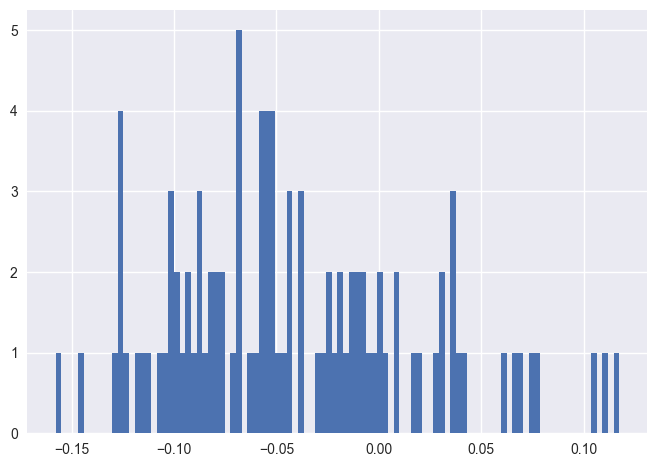

In [32]:
resultsDf['result'].where(resultsDf['type'] == 'momentum')
resultsDf['result'].where(resultsDf['type'] == 'contrarian').hist(bins=100)

In [21]:
resultsDf['result'].where(resultsDf['type'] == 'momentum').describe()

count   99.0000
mean     0.0413
std      0.0601
min     -0.1174
25%      0.0075
50%      0.0517
75%      0.0860
max      0.1577
Name: result, dtype: float64

<Axes: >

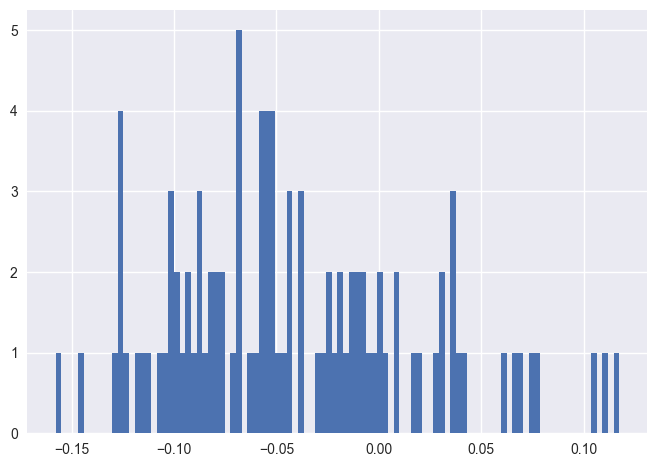

In [31]:
resultsDf['result'].where(resultsDf['type'] == 'contrarian').hist(bins=100)

In [25]:
resultsDf['result'].where(resultsDf['type'] == 'contrarian').describe()

count   99.0000
mean    -0.0413
std      0.0601
min     -0.1577
25%     -0.0860
50%     -0.0517
75%     -0.0075
max      0.1174
Name: result, dtype: float64